In [12]:
import numpy as np
import pandas as pd

In [13]:
dataFrame = pd.read_csv('../Hyperparameter_tuning/diabetes_clean.csv')
X = dataFrame.drop('diabetes', axis=1).values
y = dataFrame.diabetes.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)




C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
#Predicted probabilities using Logistic Regression
y_pred_probs = logreg.predict_proba(X_test)[:,1]#Predicted probability for the positive label

print(y_pred_probs[:5])



[0.19288018 0.66830384 0.1666485  0.50551    0.7427018 ]


### ROC(Receiver Operating Characteristic) Curve 


##### Takes in the label test set and predicted probabilities as arguments. Returns a list containing the false positive rate, the true positive rate and the logistic regression threshold

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

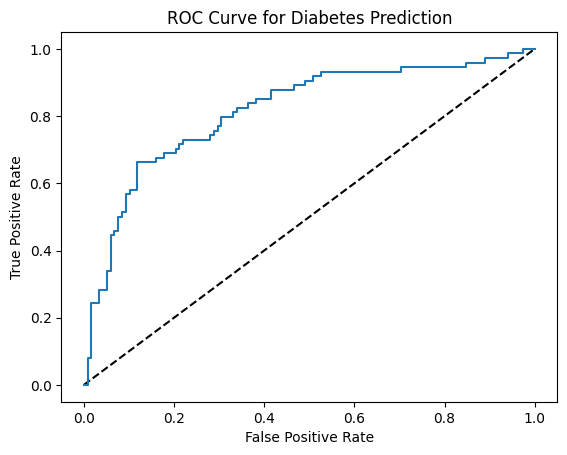

In [16]:
import matplotlib.pyplot as plt

plt.plot([0,1],[0,1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [17]:
#Calculating the ROC AUC score
print(roc_auc_score(y_test, y_pred_probs))


#Calculating the confusion matrix
y_pred  = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

#Calculating the classification report
print(classification_report(y_test, y_pred))

0.8156207054512139
[[104  14]
 [ 30  44]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       118
           1       0.76      0.59      0.67        74

    accuracy                           0.77       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.77      0.77      0.76       192

